In [2]:
# Clear all variables
%reset -f

# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
# read the CSV file into a DataFrame
csv_data = pd.read_csv("data/data.csv")

#inspect the data
display(csv_data)

,Date,Time,Mood_Level_(1-10),Energy_Level_(1-10),Stress_Level_(1-10),Activities,Hours_of_Sleep,Location,Weather,Temperature_°C
0,01/11/2024,19:06,6,3,4,walk,8.0,"Dublin, IE",overcast clouds,12.05
1,02/11/2024,12:02,7,8,2,NaN,8.5,"Dublin, IE",light intensity drizzle,11.72
2,03/11/2024,14:45,7,7,2,walk,8.2,"Dublin, IE",broken clouds,13.40
3,04/11/2024,09:55,8,6,2,walk gym,7.0,"Dublin, IE",broken clouds,12.17
4,04/11/2024,15:52,7,5,2,walk gym,7.0,"Dublin, IE",broken clouds,12.63
5,04/11/2024,19:04,8,6,3,walk gym,7.0,"Dublin, IE",broken clouds,11.27
6,05/11/2024,09:11,9,6,2,walk gym,6.8,"Dublin, IE",broken clouds,11.96
7,05/11/2024,21:08,9,3,2,rugby walk,6.8,"Dublin, IE",broken clouds,12.72
8,06/11/2024,08:50,9,9,2,walk,8.0,"Dublin, IE",broken clouds,14.31
9,06/11/2024,12:25,8,7,3,NaN,NaN,"Dublin, IE",broken clouds,17.09


In [16]:
# cleaning the data
# =================
data = csv_data

# clean the column entries
# ------------------------

# sort alphabetically 
data['Activities'] = data['Activities'].dropna().apply(lambda x: ' '.join(sorted(x.split())))

data['Activities'] = (
    data['Activities']
    .fillna('none')  # replace blank entries with "none"
    .str.strip()  # remove leading and trailing spaces
    .str.lower()  # make all lowercase
    .str.replace(' ', '_', regex=True)  # replace spaces with underscores
)



# clean the weather column
data['Weather'] = (
                    data['Weather']
                    .str.strip() # remove leading and trailing spaces
                    .str.lower() # make all lower case
                    .str.replace(' ', '_', regex=True) # remove spaces
)


# clean the location column
data['Location'] = (data['Location'].fillna('Unknown') # replace blank entries with "none"
)



# fix Na entries
# --------------

# sleep data - take previous entry for that day
data['Hours_of_Sleep'] = (data.
                          groupby('Date')['Hours_of_Sleep']. # group the sleep data by day
                          transform(lambda x: x 
                                    .fillna(method='ffill') # ffill the NA's
                                    .fillna(method='bfill'))) # back fill if available





# columns to fill NA values
columns_to_fill = ['Mood_Level_(1-10)',
                   'Energy_Level_(1-10)',
                   'Stress_Level_(1-10)',
                   'Hours_of_Sleep',
                   'Temperature_°C']

# apply rolling mean fill for each specified column
data[columns_to_fill] = data[columns_to_fill].apply(lambda x: x.fillna(x.rolling(window=5, min_periods=1).mean()))





# dummy columns
# -------------

# Add dummy columns for activities and weather
data = pd.get_dummies(data, columns=["Activities"], prefix="Activity")
data = pd.get_dummies(data, columns=["Weather"], prefix="Weather")


# MISC formatting 
# ---------------

# ensure date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')


# rename columns
data.rename(columns={'Date': 'date', 
                     'Time': 'time',
                     'Mood_Level_(1-10)':'mood',
                     'Energy_Level_(1-10)' : 'energy',
                     'Stress_Level_(1-10)' : 'stress',
                     'Hours_of_Sleep' : 'sleep',
                     'Location': 'location',
                     'Temperature_°C' : 'temp',
                     'Activity_none' : 'no_activity',
                     'Activity_rugby_walk': 'rugby_and_walk',
                     'Activity_walk' : 'walk',
                     'Activity_gym_walk' : 'walk_and_gym',
                     'Weather_broken_clouds':'broken_clouds',
                     'Weather_light_intensity_drizzle':'light_intensity_drizzle',
                     'Weather_overcast_clouds': 'overcast_clouds',
                     'Weather_clear_sky': 'clear_sky'}, inplace=True)


display(data)

,date,time,mood,energy,stress,sleep,location,temp,walk_and_gym,no_activity,Activity_rugby,rugby_and_walk,walk,broken_clouds,clear_sky,Weather_few_clouds,Weather_fog,light_intensity_drizzle,overcast_clouds
0,2024-11-01,19:06,6,3,4,8.0,"Dublin, IE",12.05,0,0,0,0,1,0,0,0,0,0,1
1,2024-11-02,12:02,7,8,2,8.5,"Dublin, IE",11.72,0,1,0,0,0,0,0,0,0,1,0
2,2024-11-03,14:45,7,7,2,8.2,"Dublin, IE",13.40,0,0,0,0,1,1,0,0,0,0,0
3,2024-11-04,09:55,8,6,2,7.0,"Dublin, IE",12.17,1,0,0,0,0,1,0,0,0,0,0
4,2024-11-04,15:52,7,5,2,7.0,"Dublin, IE",12.63,1,0,0,0,0,1,0,0,0,0,0
5,2024-11-04,19:04,8,6,3,7.0,"Dublin, IE",11.27,1,0,0,0,0,1,0,0,0,0,0
6,2024-11-05,09:11,9,6,2,6.8,"Dublin, IE",11.96,1,0,0,0,0,1,0,0,0,0,0
7,2024-11-05,21:08,9,3,2,6.8,"Dublin, IE",12.72,0,0,0,1,0,1,0,0,0,0,0
8,2024-11-06,08:50,9,9,2,8.0,"Dublin, IE",14.31,0,0,0,0,1,1,0,0,0,0,0
9,2024-11-06,12:25,8,7,3,8.0,"Dublin, IE",17.09,0,1,0,0,0,1,0,0,0,0,0


In [18]:
def make_bool(df, columns):

    # check if all specified columns exist in the DataFrame
    missing_cols = set(columns) - set(df.columns)
    
    if missing_cols:
        raise ValueError(f"The following columns are not in the DataFrame: {missing_cols}")
    
    # convert specified columns: any non-zero value becomes 1, else 0
    df[columns] = (df[columns] != 0).astype(int)
    
    return df







cols_to_exclude = ['date', 'time', 'mood', 'energy', 'stress', 'sleep',
                   'location','temp']

cols_to_group = data.columns[~data.columns.isin(cols_to_exclude)]
cols_to_group


grouped_data = data.groupby('date').mean().round(1)


make_bool(grouped_data,cols_to_group)


,mood,energy,stress,sleep,temp,walk_and_gym,no_activity,Activity_rugby,rugby_and_walk,walk,broken_clouds,clear_sky,Weather_few_clouds,Weather_fog,light_intensity_drizzle,overcast_clouds
date,,,,,,,,,,,,,,,,
2024-11-01,6.0,3.0,4.0,8.0,12.0,0,0,0,0,1,0,0,0,0,0,1
2024-11-02,7.0,8.0,2.0,8.5,11.7,0,1,0,0,0,0,0,0,0,1,0
2024-11-03,7.0,7.0,2.0,8.2,13.4,0,0,0,0,1,1,0,0,0,0,0
2024-11-04,7.7,5.7,2.3,7.0,12.0,1,0,0,0,0,1,0,0,0,0,0
2024-11-05,9.0,4.5,2.0,6.8,12.3,1,0,0,1,0,1,0,0,0,0,0
2024-11-06,8.5,8.0,2.5,8.0,15.7,0,1,0,0,1,1,0,0,0,0,0
2024-11-07,6.0,6.0,6.0,7.0,14.1,1,0,0,0,0,1,0,0,0,0,0
2024-11-08,7.0,6.0,3.5,6.2,12.5,0,1,0,0,1,1,0,0,0,1,0
2024-11-09,8.0,8.5,2.0,9.0,12.1,0,1,0,1,0,1,0,0,0,0,0


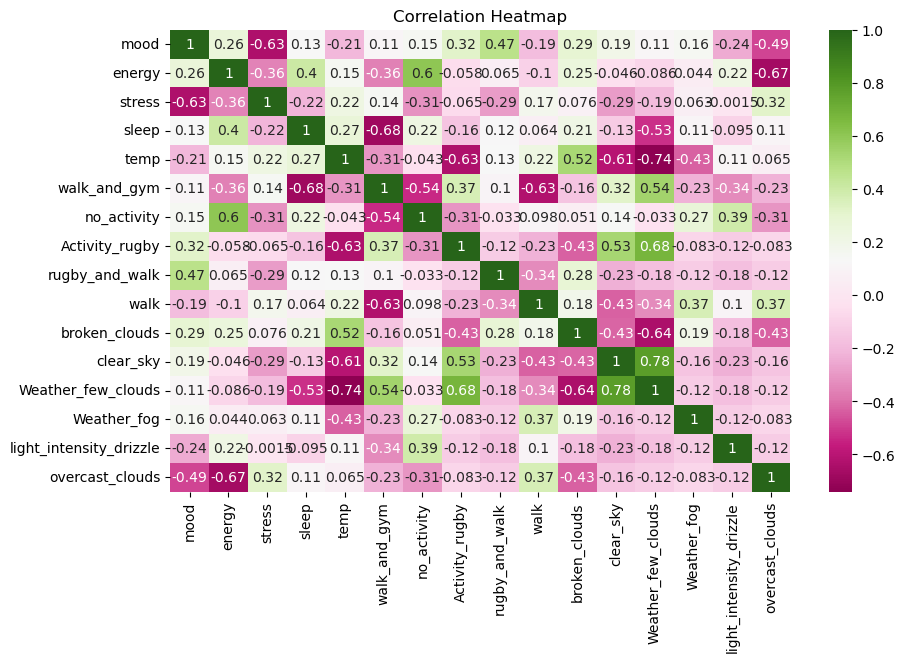

In [21]:
df = grouped_data    
    
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
## add section defs for <3 <5 <1



# calculate the correlation matrix
corr_matrix = df.corr().abs()  # using absolute values to check the strength, regardless of direction

# Define a threshold for "significant" correlations
threshold = 0.6

# Find pairs where the correlation is above the threshold, but exclude self-correlations (diagonal)
significant_corr = corr_matrix[(corr_matrix >= threshold) & (corr_matrix < 1.0)]

# Drop NaN values (non-significant pairs will be NaN after applying the threshold)
significant_corr = significant_corr.unstack().dropna().sort_values(ascending=False)

# Display the significant correlations
print(significant_corr)

Weather_few_clouds  clear_sky             0.778499
clear_sky           Weather_few_clouds    0.778499
temp                Weather_few_clouds    0.740183
Weather_few_clouds  temp                  0.740183
sleep               walk_and_gym          0.679195
walk_and_gym        sleep                 0.679195
Activity_rugby      Weather_few_clouds    0.677003
Weather_few_clouds  Activity_rugby        0.677003
overcast_clouds     energy                0.669994
energy              overcast_clouds       0.669994
Weather_few_clouds  broken_clouds         0.639602
broken_clouds       Weather_few_clouds    0.639602
Activity_rugby      temp                  0.634893
temp                Activity_rugby        0.634893
stress              mood                  0.633484
mood                stress                0.633484
walk                walk_and_gym          0.625000
walk_and_gym        walk                  0.625000
clear_sky           temp                  0.605817
temp                clear_sky  

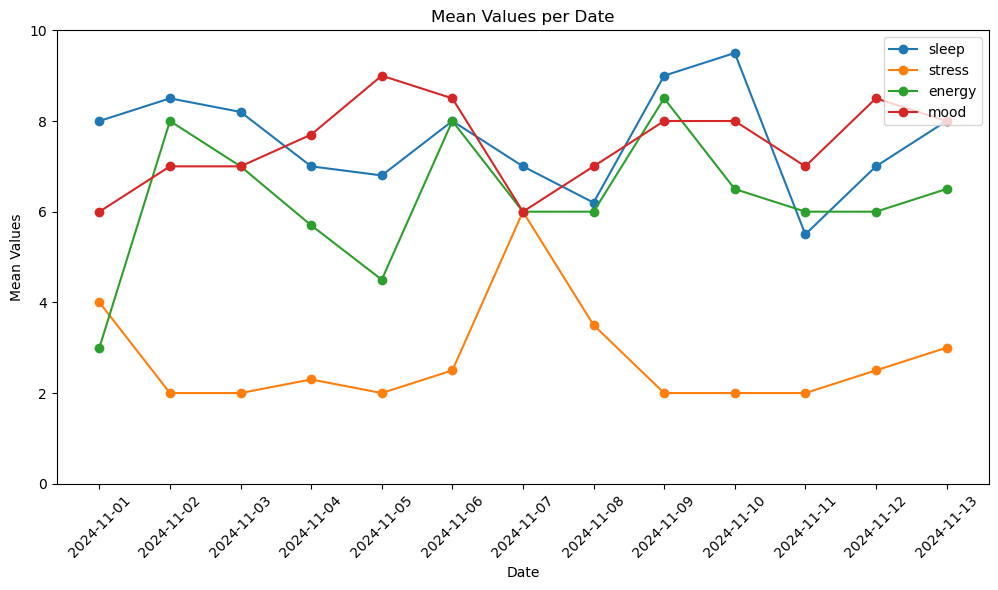

In [11]:
# Plotting
df = data
df = grouped_data    

variables = ['sleep','stress', 'energy', 'mood']

# Group by date and calculate the mean
daily_means = df[variables]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(daily_means.index, daily_means.values, marker='o')  # Line plot with markers
plt.xlabel('Date')
plt.ylabel('Mean Values')
plt.title('Mean Values per Date')
plt.xticks(rotation=45)
plt.legend(daily_means.columns, loc='upper right')
plt.tight_layout()
plt.ylim((0,10))

plt.show()

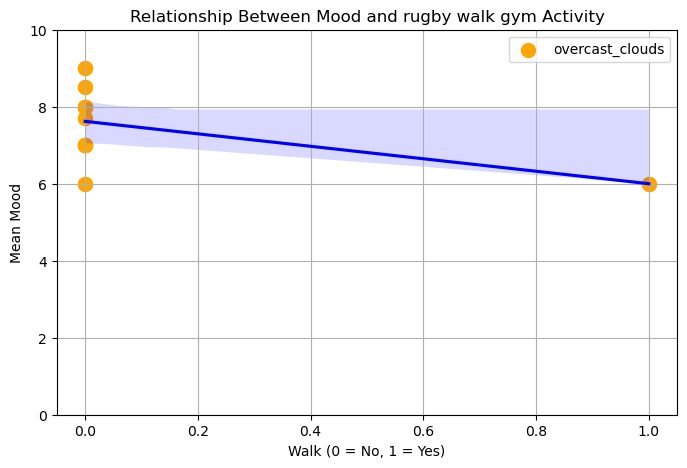

In [85]:
df = grouped_data

# Plotting
plt.figure(figsize=(8, 5))

# Scatter plot for mean_mood vs. _walk
plt.scatter(df['overcast_clouds'], df['mood'], color='orange', label='overcast_clouds', s=100)


sns.regplot(x=df['overcast_clouds'], y=df['mood'], scatter_kws={'color': 'orange', 's': 100}, line_kws={'color': 'blue'})

plt.ylim(0, 10)


# Adding labels and title
plt.xlabel('Walk (0 = No, 1 = Yes)')
plt.ylabel('Mean Mood')
plt.title('Relationship Between Mood and rugby walk gym Activity')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

